# <div style="text-align:center; padding:15px; color:white; margin:0; font-size:150%; font-family:'Times New Roman'; background-color:#7E8083   ; overflow:hidden"><b>Import libraries and load data</b></div>

In [35]:
import pandas as pd 
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, r2_score
import warnings

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from hpsklearn import HyperoptEstimator
from hpsklearn import any_regressor
from hpsklearn import any_preprocessing
from hyperopt import tpe
warnings.filterwarnings("ignore")

In [23]:
df=pd.read_csv("../../data/predict/train.csv")
df_test=pd.read_csv("../../data/predict/test.csv")
df['Target'] = df['Target'].apply(lambda x: ast.literal_eval(x))
df_test['Target'] = df_test['Target'].apply(lambda x: ast.literal_eval(x))
count = 9

In [7]:
print(df.head())
print(df.isnull().sum())
print(df.info())

   Commit Count  Bot Commit  Modified File Count (Average)  Created Issues  \
0             3           0                       1.333333               0   
1             9           0                      11.000000               0   
2             6           0                      16.666667               0   
3             3           0                       1.000000               0   
4             7           0                       1.285714               0   

   Closed Issues  Label Counts (Average)  Reopened Issues  Created PRs  \
0              0                     0.0                0            0   
1              0                     0.0                0            0   
2              0                     0.0                0            0   
3              0                     0.0                0            1   
4              0                     0.0                0            0   

   Closed PRs  PR Length  ...  Markdown Lines  Code Files  Code Lines  \
0           0

# <div style="text-align:center; padding:15px; color:white; margin:0; font-size:150%; font-family:'Times New Roman'; background-color:#7E8083   ; overflow:hidden"><b>Model</b></div>

In [111]:
X_train = df.drop(columns=['Target'])
Y_train = np.array([[0] * count if len(lst) == 0 else np.pad(lst, (0, count - len(lst)), 'mean') for lst in df['Target']])  # 转换为 NumPy 数组，形状为 (n_samples, count)

X_test = df_test.drop(columns=['Target'])
Y_test = np.array([[0] * count if len(lst) == 0 else np.pad(lst, (0, count - len(lst)), 'mean') for lst in df_test['Target']])  # 转换为 NumPy 数组，形状为 (n_samples, count)

In [117]:
from sklearn.metrics import mean_squared_error


Y_train_0 = Y_train[:, 0]
Y_test_0 = Y_test[:, 0]

model = HyperoptEstimator(regressor=any_regressor('reg'), 
                          loss_fn=mean_squared_error, 
                          algo=tpe.suggest, max_evals=50, trial_timeout=30)
# perform the search
model.fit(X_train, Y_train_0)
# summarize performance
mae = model.score(X_test, Y_test_0)
print("MAE: %.3f" % mae)
# summarize the best model
print(model.best_model())

100%|██████████| 50/50 [00:00<00:00,  3.27trial/s, best loss: 49.545314340628686]
MAE: 0.149
{'learner': RandomForestRegressor(criterion='absolute_error',
                      max_features=0.9838217649404991,
                      min_impurity_decrease=0.02, min_samples_leaf=12,
                      n_estimators=254, n_jobs=1, random_state=np.int64(2),
                      verbose=False), 'preprocs': (Normalizer(norm='max'),), 'ex_preprocs': ()}


11.44084059612544


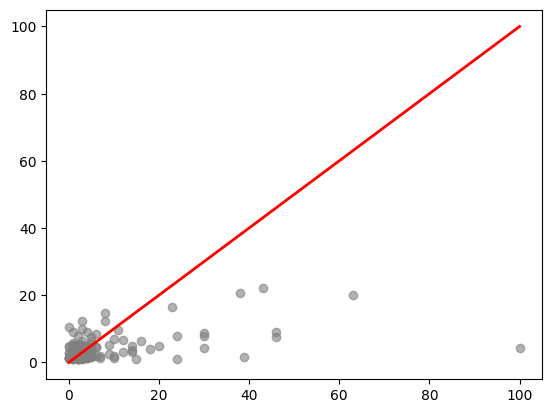

In [118]:
y_pred_i = model.predict(X_test)
mse = root_mean_squared_error(Y_test_0, y_pred_i)
print(mse)
plt.scatter(Y_test_0, y_pred_i, color='grey', alpha=0.6)
plt.plot([Y_test_0.min(), Y_test_0.max()], [Y_test_0.min(), Y_test_0.max()], color='red', lw=2)
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import Normalizer


models = []
predictions = []
Y_test_list = []

# 循环训练count个模型
for i in range(count):
    # 获取第 i 个目标
    Y_train_i = Y_train[:, i]

    Y_test_i = Y_test[:, i]
    Y_test_list.append(Y_test_i)
    
    y_pred_i = model.predict(X_test)
    predictions.append(y_pred_i)

    # 输出每个模型的性能

    mse = root_mean_squared_error(Y_test_i, y_pred_i)
    print(f"Model {i + 1} Mean Squared Error: {mse:.4f}")

ValueError: Expected 2D array, got 1D array instead:
array=[  1.   4.   2.   1.   2.   1.   3.   1.  10.   4.   5.   4.   0.  12.
   1.   0.   1.   3.   0.   8.  11.   6.   2.   6.   1.   1.   0.   2.
   3.   2.   0.   7.   1.   1.   5.   1.   5.   4.   1.   2.   3.  63.
  43.  23.  30.  16.   2.   1.   1.  30.   1.   2.  20.   5.   1.   1.
   3.   5.   3.   8.   3.   2.  10.   9.   1.   5.  15.   1.  10.   2.
   3.   1.   2.   1.   4.   3.   9. 100.   1.  46.   5.   3.   5.   2.
  12.   3.   1.   1.   2.   2.   4.  24.  38.   6.   3.   1.   4.   5.
   2.   1.  30.   3.   0.   0.   5.   3.   2.   3.   3.   2.   2.   1.
   1.   3.   7.  46.   4.  39.   2.  14.   3.   1.   4.   1.   4.   2.
   0.   2.   1.   1.  18.   4.  14.   2.   4.   2.   1.   3.   4.   0.
   3.   2.  14.   6.   4.   1.  24.   2.   0.   1.   2.   2.   0.   1.
   3.   3.   2.   0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

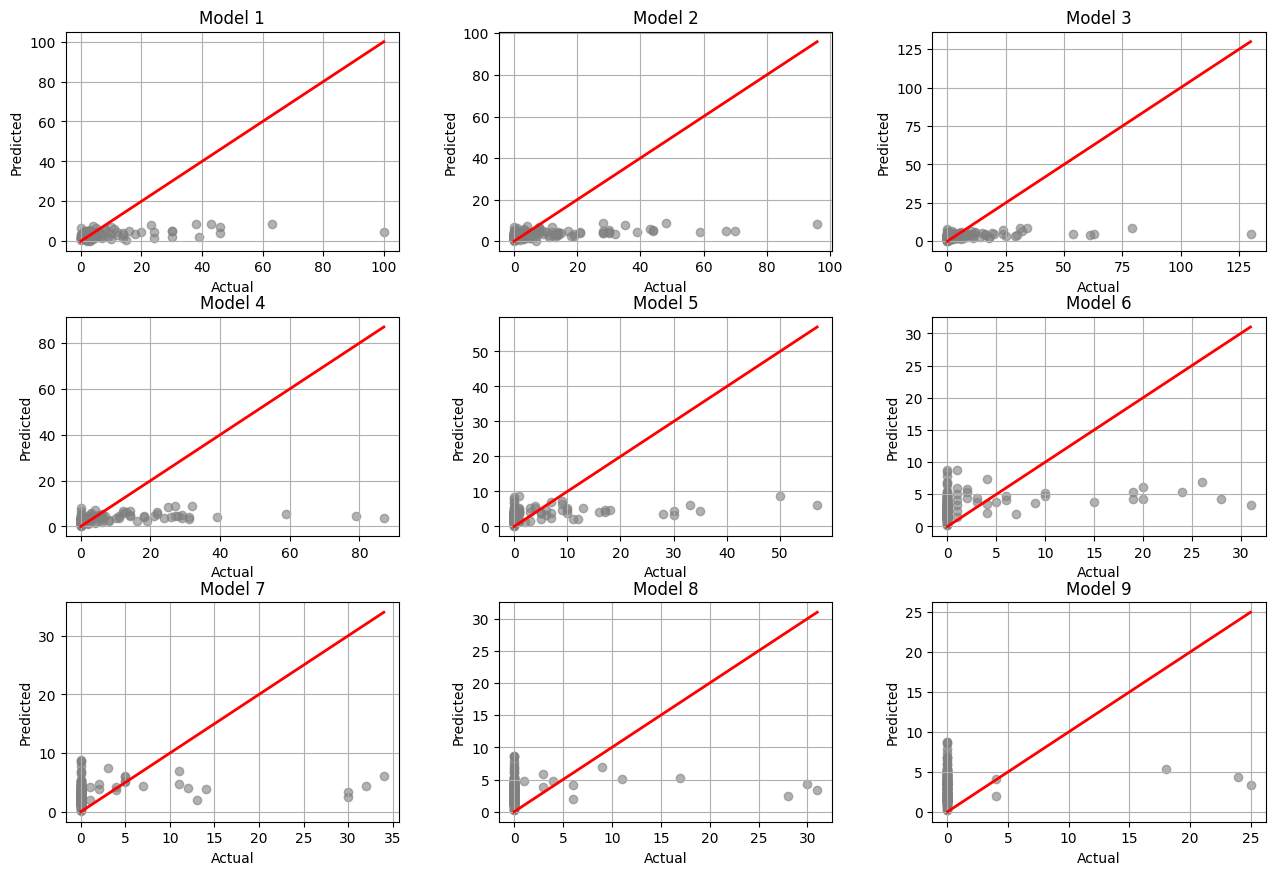

In [47]:
# 可视化所有count个模型的预测结果
plt.figure(figsize=(15, 10))

for i in range(count):
    plt.subplot(3, 3, i + 1)
    plt.scatter(Y_test_list[i], predictions[i], color='grey', alpha=0.6)
    plt.plot([Y_test_list[i].min(), Y_test_list[i].max()], [Y_test_list[i].min(), Y_test_list[i].max()], color='red', lw=2)
    plt.title(f'Model {i + 1}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid()

# 调整间距
plt.subplots_adjust(left=0.1, top=0.9, hspace=0.3, wspace=0.3)